<a href="https://colab.research.google.com/github/aryadeo/NEURAL_NETWORK_BASICS/blob/master/Sigmoid_Neuron/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

#PLotting 2D sigmoid

The equation ofa sigmoid function is:


**$\sigma_{w,b}(x)=\frac{1}{1+e^{-wx+ b }}$**

In [0]:
def sig_2D(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [86]:
sig_2D(1,2,2)

0.9820137900379085

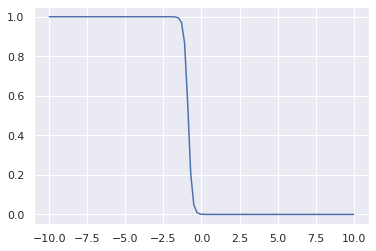

In [87]:
b=-7     #@param {type: "slider", min: -10, max: 10,step:0.5}
w=-8     #@param {type: "slider", min: -20, max: 20, step: 0.5}
X=np.linspace(-10,10,100)
Y=sig_2D(X,w,b)
plt.plot(X,Y)
plt.show()

#Plotting 3D Sigmoid

$\sigma_{W,b}(X)=\frac{1}{1+e^{-(\sum_i w_ix_i+b)}}$

In [0]:
def sig_3D(X,W,b):
  result=0
  for x,w in zip(X,W):
    result += np.sum(w*x)
  return 1/(1+(np.exp(-(result+b))))


In [0]:
X=np.array(([1,10],[2,20]))
W=np.array(([1,1],[0.1,0.1]))
b=2

In [90]:
result_f=sig_3D(X,W,b)
print(result_f)
print(np.ndim(result_f))

0.9999997495484255
0


As the result is coming as a scalar, hence the function defining procedure is wrong.

Let's correct the function again

In [0]:
def sig_3D(X,W,b):
    return 1/(1+(np.exp(-(W*X+b))))
# In this case the multiplication ill be element wise and it wwon't create any problem for multi dimensional tensor.

In [92]:
result=sig_3D(X,W,b)
print(result)
print(np.ndim(result))

[[0.95257413 0.99999386]
 [0.90024951 0.98201379]]
2


This is the correct output for the given input.

Now let's draw a surface plot for this.

In [0]:
from mpl_toolkits import mplot3d

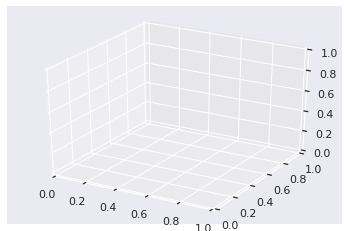

In [94]:
fig = plt.figure()
ax = plt.axes(projection='3d')

We need to create two vectors along the two axes and should create a meshgrid out of them

In [0]:
x1=np.linspace(-10,10,100)
x2=np.linspace(-10,10,100)
X_1,X_2=np.meshgrid(x1,x2)#np.meshgrid() Return coordinate matrices from coordinate vectors. So to access the first matrix we have assign X_1 and X_2.

# X_1 and X_2 both has the same elements. We can use any one of them to create the function evaluation.

In [96]:
Y=sig_3D(X_1,0.5,0)
print(Y)

[[0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 ...
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]]


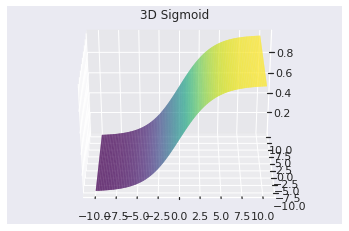

In [97]:
ax = plt.axes(projection='3d')
ax.plot_surface(X_1,X_2,Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('3D Sigmoid')
ax.view_init(30,270)

Date: 22.11.2019

Till now we have given a 2D tensor as X and W input to the sigmoid function and calculated the output as Y and plotted a 3D surface plot for Y vs X1 and X2. But Y is computed for X1 only.

Now we will compute Y for both X1 and X2 and will have a 3D surface plot for Y vs. X1 and X2. Y need to be a 2D tensor and X1 and X2 should also be a 2D tensor each.

So today we will do the following task.

1. Define a sigmoid function from two X tensors.
2. Plot the corresponding 3D plot of the Y vs (X1 and X2)
3. Compute the Loss and PLot the Loss vs (w and b)
4. plot the contour plot of Y vs (X1 and X2)


In [0]:
#definig the sigmoid function
def sigmoid_3D_test(X1,X2,W1,W2,b):
  return 1/(1+np.exp(-(W1*X1+W2*X2)+b))

In [0]:
#define X1 and X2
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
X1_g,X2_g=np.meshgrid(X1,X2)
Y=sigmoid_3D_test(X1_g,X2_g,0.5,0.5,1)


In [100]:
print(Y)
print(X1_g.shape)
print(type(X1_g))
print(Y.shape)

[[1.67014218e-05 1.84765467e-05 2.04403384e-05 ... 2.31116029e-01
  2.49550680e-01 2.68941421e-01]
 [1.84765467e-05 2.04403384e-05 2.26128482e-05 ... 2.49550680e-01
  2.68941421e-01 2.89258118e-01]
 [2.04403384e-05 2.26128482e-05 2.50162583e-05 ... 2.68941421e-01
  2.89258118e-01 3.10457825e-01]
 ...
 [2.31116029e-01 2.49550680e-01 2.68941421e-01 ... 9.99815183e-01
  9.99832937e-01 9.99848985e-01]
 [2.49550680e-01 2.68941421e-01 2.89258118e-01 ... 9.99832937e-01
  9.99848985e-01 9.99863492e-01]
 [2.68941421e-01 2.89258118e-01 3.10457825e-01 ... 9.99848985e-01
  9.99863492e-01 9.99876605e-01]]
(100, 100)
<class 'numpy.ndarray'>
(100, 100)


In [0]:
from mpl_toolkits import mplot3d

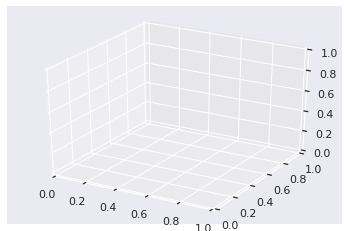

In [102]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Text(0.5, 0, 'Z')

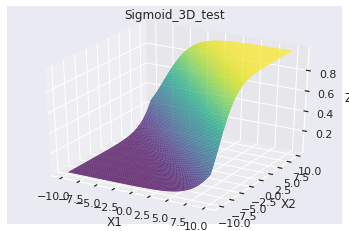

In [103]:
ax = plt.axes(projection='3d')
ax.plot_surface(X1_g,X2_g,Y, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Sigmoid_3D_test')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')
#ax.view_init(30,270)

Task:2

$Loss=\sum_i(y_i-\hat{y_i})^2$

where 

$\hat{y_i}=predicted\space output$ 

$y_i=ground \space truth$

In [0]:
#computing the loss from a X 
def sigmoid_test(X,W,b):
  return 1/(1+(np.exp(-(W*X+b))))

def loss_func(X,Y,W,b):
  loss=0
  Y_h=sigmoid_test(X,W,b)
  for y,y_h in zip (Y,Y_h):
    loss+=(y-y_h)**2
  return loss

In [0]:
X=np.linspace(-10,10,100)

In [106]:
#Create a ground truth for all X
Y=sigmoid_test(X,0.5,0)
print(Y)

[0.00669285 0.00739896 0.00817894 0.00904041 0.00999169 0.01104196
 0.01220126 0.01348063 0.01489212 0.01644893 0.01816549 0.02005754
 0.0221422  0.02443814 0.02696557 0.02974643 0.03280439 0.036165
 0.0398557  0.04390588 0.04834692 0.05321217 0.0585369  0.06435824
 0.07071501 0.07764755 0.0851974  0.093407   0.1023192  0.11197671
 0.12242144 0.13369374 0.14583148 0.1588691  0.17283646 0.18775769
 0.20364993 0.22052213 0.23837374 0.25719365 0.2769591  0.29763488
 0.31917283 0.34151151 0.36457644 0.38828059 0.41252537 0.43720205
 0.46219351 0.48737642 0.51262358 0.53780649 0.56279795 0.58747463
 0.61171941 0.63542356 0.65848849 0.68082717 0.70236512 0.7230409
 0.74280635 0.76162626 0.77947787 0.79635007 0.81224231 0.82716354
 0.8411309  0.85416852 0.86630626 0.87757856 0.88802329 0.8976808
 0.906593   0.9148026  0.92235245 0.92928499 0.93564176 0.9414631
 0.94678783 0.95165308 0.95609412 0.9601443  0.963835   0.96719561
 0.97025357 0.97303443 0.97556186 0.9778578  0.97994246 0.98183451


In [107]:
#create a mshgrid of W and b and see the effect of change in their values over the loss function
W=np.linspace(-10,10,100)
B=np.linspace(-10,10,100)
W_g,B_g=np.meshgrid(W,B)
print(W_g.shape,B_g.shape)

(100, 100) (100, 100)


In [108]:
#Let's create a null array for Loss values and compute the loss for every value of W in the meshgrid
Loss_matrix=np.zeros(W_g.shape)

# for l in range(W.shape[0]):

for i in range(W_g.shape[0]):
  for j in range(W_g.shape[1]):
    Loss_matrix[i,j]=loss_func(X,Y,W_g[i,j],B_g[i,j])
print(Loss_matrix)

[[75.50257521 75.46626771 75.427572   ...  3.99357054  3.97706272
   3.96148698]
 [75.52632987 75.49141864 75.4541042  ...  3.96767151  3.95191947
   3.93693017]
 [75.5493831  75.51572272 75.47979882 ...  3.94199041  3.92691244
   3.91257874]
 ...
 [75.5493831  75.51572272 75.47979882 ...  3.94199041  3.92691244
   3.91257874]
 [75.52632987 75.49141864 75.4541042  ...  3.96767151  3.95191947
   3.93693017]
 [75.50257521 75.46626771 75.427572   ...  3.99357054  3.97706272
   3.96148698]]


In [109]:
print(Loss_matrix.shape)

(100, 100)


Text(0.5, 0, 'Loss')

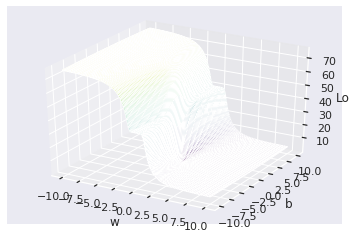

In [110]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W_g, B_g, Loss_matrix,rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')